# Análisis de datos con Pandas
![](https://ecmetrics.com/es/wp-content/uploads/2017/08/big-data-para-el-online-community.jpg)

Una de las habilidades con más demanda en la actualidad es la de ser capáz de analizar datos y obtener resultados, tendencias, resúmenes, aproximaciones... en general, tomar los datos y obtener información. La librería pandas nos permite obtener información de los datos utilizando instrucciones consisas y simples, sobre un DataFrame que puede ser tan grande como el sistema pueda soportarlo (Excel tiene un limite actual de 1.048.576 filas por 16.384 columnas sin importar si se cuanta con más o menos RAM).

Luis A. Muñoz

## Análisis de datos de la Liga Española

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset_la_liga.csv")

In [3]:
df.tail()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
903,2016-17,Villarreal,11,8,4,5,19,9,10,38,67,35,21,56,33,23
904,2016-17,Sevilla,14,7,1,7,21,8,9,38,72,39,30,69,49,20
905,2016-17,Atletico de Madrid,14,9,3,3,23,6,9,38,78,40,30,70,27,43
906,2016-17,Barcelona,15,13,1,3,28,4,6,38,90,64,52,116,37,79
907,2016-17,Real Madrid,14,15,1,2,29,3,6,38,93,48,58,106,41,65


El método `describe()` nos retorna un DataFrame con la siguiente información por columna:
    
- Número de valores válidos (no NaN)
- La media
- La desviación estándar
- El valor mínimo y máximo
- Los percentiles (25%, 50% y 75%)

In [4]:
df.describe()

,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,9.582599,4.118943,4.118943,9.582599,13.701542,13.701542,9.577093,36.980176,50.681718,29.508811,18.267621,47.776432,47.776432,0.000000
std,3.107555,2.776725,2.531206,3.092974,4.966050,4.589442,2.986852,2.522150,14.104626,9.757192,7.569011,15.593429,11.855507,21.680653
min,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,30.000000,13.000000,11.000000,4.000000,15.000000,18.000000,-64.000000
25%,7.000000,2.000000,2.000000,8.000000,10.000000,11.000000,7.000000,34.000000,42.000000,23.000000,13.000000,37.000000,39.000000,-14.000000
50%,9.000000,4.000000,4.000000,10.000000,13.000000,14.000000,9.000000,38.000000,48.000000,28.000000,17.000000,45.000000,47.000000,-3.000000
75%,12.000000,6.000000,6.000000,12.000000,16.000000,17.000000,12.000000,38.000000,59.000000,34.000000,22.000000,54.000000,56.000000,10.250000
max,19.000000,16.000000,15.000000,18.000000,32.000000,29.000000,18.000000,44.000000,100.000000,78.000000,58.000000,121.000000,94.000000,89.000000


El método `info` nos da información sobre las columnas y los tipos de datos. Esta es una forma de comprobar si tenemos valores NaN.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           908 non-null    object
 1   club             908 non-null    object
 2   home_win         908 non-null    int64 
 3   away_win         908 non-null    int64 
 4   home_loss        908 non-null    int64 
 5   away_loss        908 non-null    int64 
 6   matches_won      908 non-null    int64 
 7   matches_lost     908 non-null    int64 
 8   matches_drawn    908 non-null    int64 
 9   total_matches    908 non-null    int64 
 10  points           908 non-null    int64 
 11  home_goals       908 non-null    int64 
 12  away_goals       908 non-null    int64 
 13  goals_scored     908 non-null    int64 
 14  goals_conceded   908 non-null    int64 
 15  goal_difference  908 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 113.6+ KB


Tomando este DataFrame, podemos responder algunas preguntas simples:
    
### ¿Cuáles han sido los equipos que han ganado La Liga por temporada?  

In [6]:
df.head()

,season,club,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
0,1970-71,Real Zaragoza,3,0,5,13,3,18,9,30,18,14,8,22,54,-32
1,1970-71,Elche,4,0,5,11,4,16,10,30,22,17,8,25,46,-21
2,1970-71,Las Palmas,5,0,3,12,5,15,10,30,25,25,8,33,42,-9
3,1970-71,Sabadell,8,0,3,14,8,17,5,30,29,19,9,28,49,-21
4,1970-71,Espanyol,7,1,4,9,8,13,9,30,33,13,5,18,25,-7


In [7]:
df_campeones_por_temporada = df.sort_values('points', ascending=False).drop_duplicates(['season']).sort_values('season')[['season', 'club', 'points']]
df_campeones_por_temporada

,season,club,points
15,1970-71,Barcelona,62
33,1971-72,Real Madrid,66
51,1972-73,Atletico de Madrid,68
69,1973-74,Barcelona,71
87,1974-75,Real Madrid,70
105,1975-76,Real Madrid,68
123,1976-77,Atletico de Madrid,65
141,1977-78,Real Madrid,69
159,1978-79,Real Madrid,63
177,1979-80,Real Madrid,75


### ¿Cuál ha sido el equipo que más veces ha ganado La Liga?  

In [8]:
df_campeones_por_temporada[['club', 'season']].groupby('club').count().sort_values('season', ascending=False)

,season
club,
Real Madrid,20
Barcelona,18
Atletico de Madrid,4
Valencia,2
Athletic Club,1
Deportivo,1
Real Sociedad,1


### ¿Cuál es el equipo que más veces ha perdido La Liga?

In [9]:
df_perdedores_por_temporada = df.sort_values('points').drop_duplicates(['season']).sort_values('season')[['season', 'club', 'points']]
df_perdedores_por_temporada[['club', 'season']].groupby('club').count().sort_values('season', ascending=False).iloc[0:5]

,season
club,
Murcia,3
Real Zaragoza,3
Salamanca,2
Racing de Santander,2
Rayo Vallecano,2


### ¿Cuál fueron los tres años en el que se obtuvieron los más altos puntajes en el torneo? 

In [10]:
df[['season', 'points']].groupby(by='season').sum().sort_values('points', ascending=False).iloc[0:3]

,points
season,
1996-97,1267
1995-96,1256
1986-87,1087


### ¿Cuál es el equipo que más veces ha ganado torneos en casa?

In [11]:
df[['club', 'home_win']].groupby(by='club').sum().sort_values('home_win', ascending=False).iloc[0:3]

,home_win
club,
Real Madrid,663
Barcelona,652
Atletico de Madrid,520


### ¿Cuál es el equipo que más veces ha ganado torneos de visitante?

In [12]:
df[['club', 'away_win']].groupby(by='club').sum().sort_values('away_win', ascending=False).iloc[0:3]

,away_win
club,
Real Madrid,388
Barcelona,373
Atletico de Madrid,259


## ¿Cuales son  los cinco equipos que más veces han ganado jugando como local?

In [47]:
df[['club', 'home_win']].groupby(by='club').sum().sort_values('home_win', ascending=False).iloc[:5]

,home_win
club,
Real Madrid,663
Barcelona,652
Atletico de Madrid,520
Athletic Club,502
Valencia,500


## ¿Cuales son los equipos que, por temporada, han ganado mas encuentros?

In [13]:
df[['season', 'club', 'matches_won']].sort_values('matches_won', ascending=False).drop_duplicates(['season'])

,season,club,matches_won
807,2011-12,Real Madrid,32
827,2012-13,Barcelona,32
766,2009-10,Real Madrid,31
787,2010-11,Barcelona,30
866,2014-15,Real Madrid,30
907,2016-17,Real Madrid,29
887,2015-16,Barcelona,29
323,1987-88,Real Madrid,28
847,2013-14,Atletico de Madrid,28
506,1996-97,Barcelona,28


## ¿Cuánto de cierto hay que los equipos se esfuerzan en ganar como locales?

In [63]:
df_home_away_win = df[['club', 'home_win', 'away_win']].groupby(by='club').mean()
df_home_away_win['home_over_away'] = df_home_away_win['home_win'] / df_home_away_win['away_win']
df_home_away_win['home_status'] = df_home_away_win['home_over_away'] > 1
df_home_away_win

,home_win,away_win,home_over_away,home_status
club,,,,
AD Almeria,7.500000,0.500000,15.000000,True
Alaves,8.285714,4.571429,1.812500,True
Albacete,7.857143,3.000000,2.619048,True
Almeria,6.666667,3.666667,1.818182,True
Athletic Club,10.680851,4.148936,2.574359,True
Atletico de Madrid,11.555556,5.755556,2.007722,True
Barcelona,13.872340,7.936170,1.747989,True
Betis,8.777778,3.972222,2.209790,True
Burgos,8.666667,1.166667,7.428571,True


# Presentación de resultados gráficos con Pandas
La combinación de las librerías Pandas y Matplotlib permiten obtener gráficos a partir de los DataFrames. Aunque es posible utilzar los datos de un DataFrame como argumentos de las instrucciones para construír gráficos de Matplotlib, Pandas accede al Matplotlib API (esto es, a utilizar directamente las funciones gráficas de Matplotlib) de forma tal que puede utilizar sus propios métodos para generar los graficos resultantes.

Se puede modificar el estilo del resultado gráfico con `plt.style.use(style_str)`. Un listado de los estilos gráficos se encuentra [en este link](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')      # Modificamos el formato del estilo para 
                             # obtener gráficos más atractivos. Default:('classic')

## Pandas plot
El método df.plot() permite gráficar un DataFrame en una figura con varias opciones:

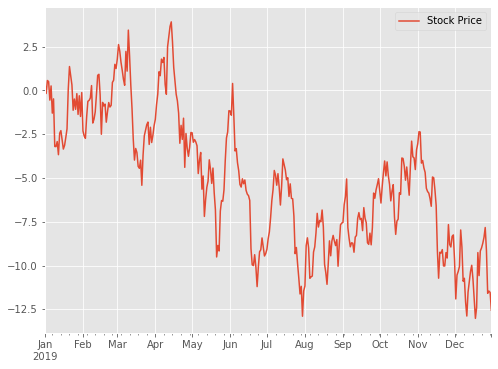

In [2]:
df = pd.DataFrame(data=np.random.randn(365), 
                 index=pd.date_range('2019/1/1', periods=365), 
                 columns=['Stock Price'])
df = df.cumsum()
df.plot(figsize=(8, 6))
plt.show()

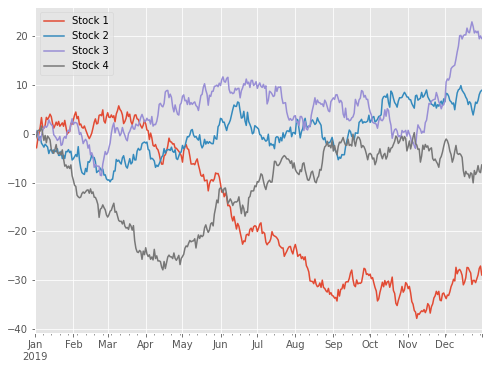

In [3]:
df = pd.DataFrame(data=np.random.randn(365, 4), 
                 index=pd.date_range('2019/1/1', periods=365), 
                 columns=['Stock 1', 'Stock 2', 'Stock 3', 'Stock 4'])
df = df.cumsum()
df.plot(figsize=(8, 6))
plt.show()

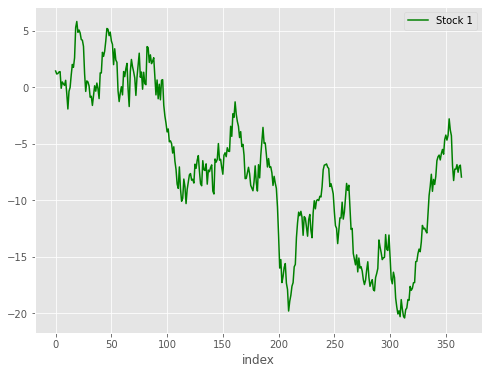

In [4]:
df = pd.DataFrame(data=np.random.randn(365, 2), 
                 columns=['Stock 1', 'Stock 2']).cumsum()
df['index'] = pd.Series(data=list(range(len(df))))
df.head()

df.plot(x='index', y='Stock 1', color='g', figsize=(8, 6))
plt.show()

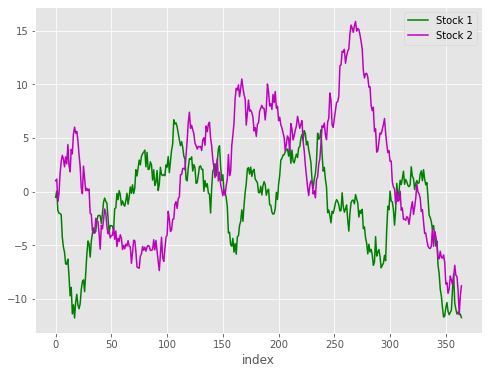

In [5]:
df = pd.DataFrame(data=np.random.randn(365, 2), 
                 columns=['Stock 1', 'Stock 2']).cumsum()
df['index'] = pd.Series(data=list(range(len(df))))
df.head()

df.plot(x='index', y=['Stock 1', 'Stock 2'], color=['g', 'm'], figsize=(8, 6))
plt.show()

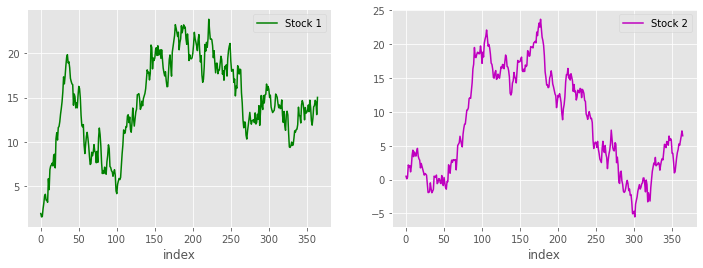

In [6]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)

df = pd.DataFrame(data=np.random.randn(365, 2), 
                 columns=['Stock 1', 'Stock 2']).cumsum()
df['index'] = pd.Series(data=list(range(len(df))))
df.head()

df.plot(x='index', y='Stock 1', color='g', ax=ax1)
df.plot(x='index', y='Stock 2', color='m', ax=ax2)
plt.show()

## DatetimeIndex y ajuste de tipos de datos
Cuando se grafica una columna de una DataFrame, se hara contra el índice del DataFrame. Si los datos son denaturaleza TimeSeries, deberán adoptarse un indice del tipo DatetimeIndex. Por otro lado, cuando se importan datos a Pandas, sobre todo cuando se leen de una fuente web, puede ser necesario convertir de datos que serán importados como `str` al tipo requerido.

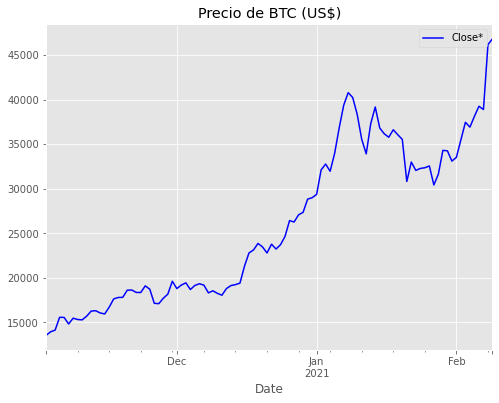

In [7]:
# Se obtiene los datos de cotizacion y se elimina la ultima fila
data = pd.read_html("https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD")
df = data[0]
df.drop(df.tail(1).index, inplace=True)

# Se reemplaza el index por un DatetimeIndex
df.index = pd.DatetimeIndex(df['Date'])
df.drop(columns='Date', inplace=True)

# Se convierten los datos a valores numéricos
df['Close*'] = df['Close*'].apply(lambda x: float(x))

# Se grafican los resultados
fig, ax = plt.subplots(figsize=(16, 4))
df.plot(y='Close*', color='b', figsize=(8, 6), ax=ax)
plt.title("Precio de BTC (US$)")
plt.show()

## Otros gráficos

Adicionalmente, se pueden obtener estos gráficos adicionales en Pandas:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist         
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

También se puede llamar a `df.plot(kind='hist')` o reemplazar el argunento `kind` con cualquier termino mostrado en la lista anterior e.g. 'box','barh', etc..)

   Data0  Data1  Data2  Data3
0     12     55     33     27
1     42     65     68     22
2     81     93     24     20
3     87     98     82     52
4     42     66     61     57
5     86     43     25     37
6     26     11     15     31
7     63     31     57     29
8     58     69     36     36
9     66     95     82     64


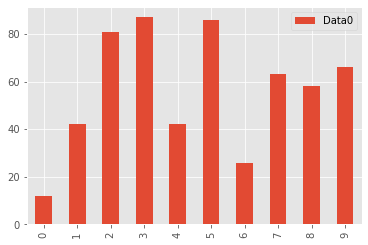

In [8]:
df = pd.DataFrame(data=np.random.randint(10, 100, (10, 4)))
df.rename(columns=lambda x: "Data" + str(x), inplace=True)
print(df)

df.plot.bar(y='Data0')
plt.show()

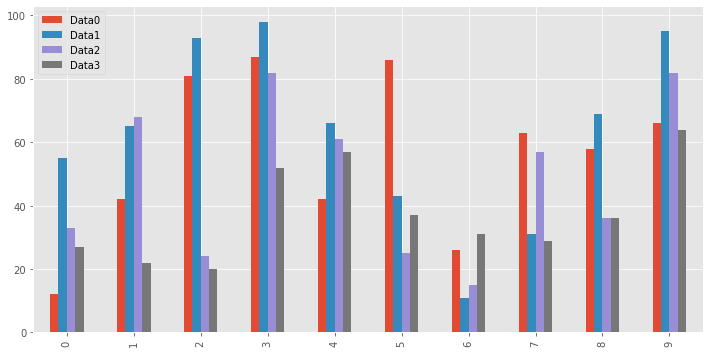

In [9]:
df.plot.bar(figsize=(12, 6))
plt.show()

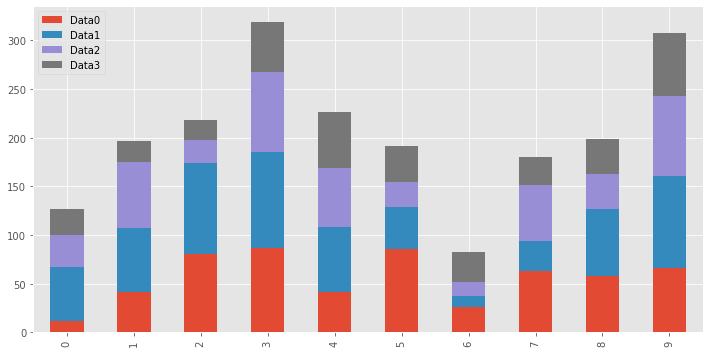

In [10]:
df.plot.bar(stacked=True, figsize=(12, 6))
plt.show()

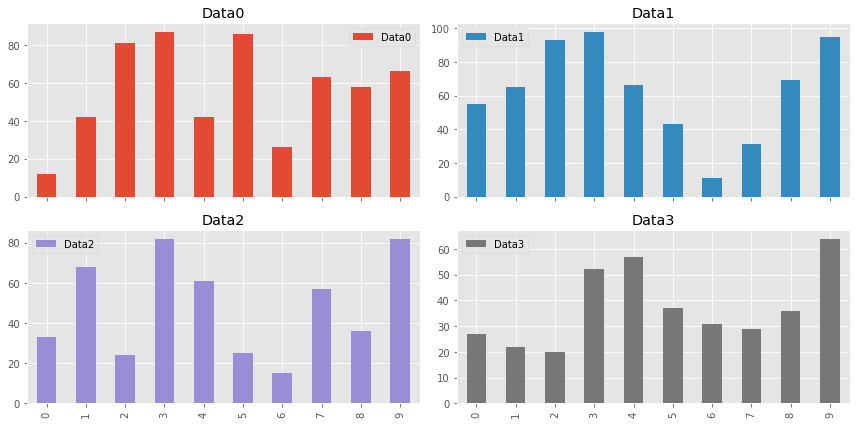

In [11]:
df.plot.bar(subplots=True, layout=(2, 2), figsize=(12, 6))
plt.tight_layout()
plt.show()

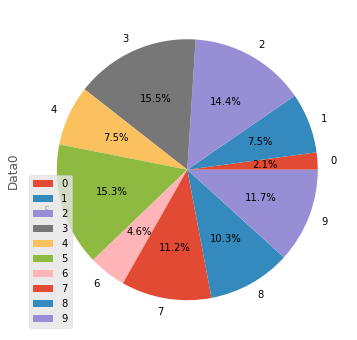

In [12]:
df.plot.pie(y='Data0', figsize=(12, 6), autopct="%.1f%%")
plt.show()

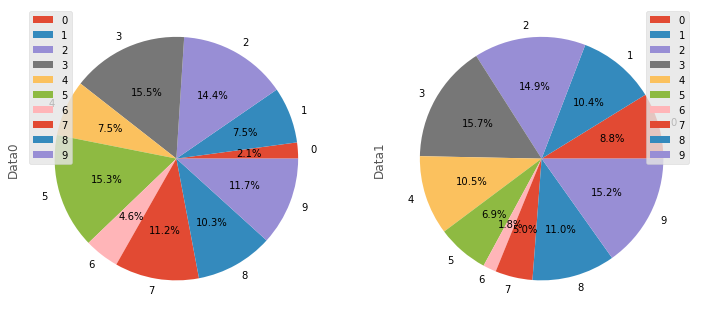

In [13]:
df[['Data0', 'Data1']].plot.pie(figsize=(12, 6), autopct="%.1f%%", subplots=True)
plt.show()

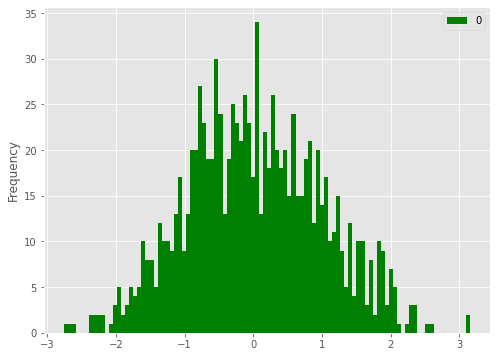

In [14]:
df = pd.DataFrame(data=np.random.randn(1000, 3))
df.plot.hist(y=0, bins=100, color='g', figsize=(8, 6))
plt.show()

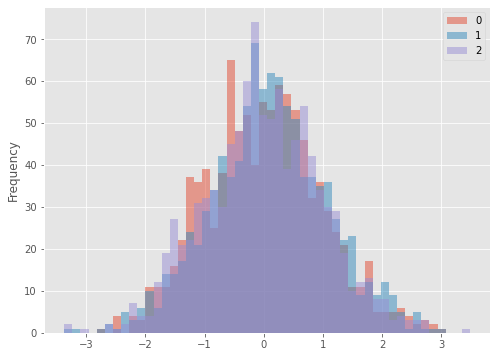

In [16]:
df = pd.DataFrame(data=np.random.randn(1000, 3))
df.plot.hist(alpha=0.5, bins=50, figsize=(8, 6))
plt.show()

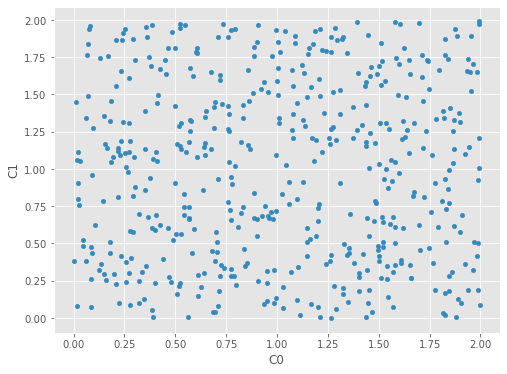

In [17]:
df = pd.DataFrame(data=np.random.uniform(0, 2, (500, 3)),
                 columns=['C0', 'C1', 'C2'])
df.plot.scatter(x='C0', y='C1', figsize=(8, 6))
plt.show()

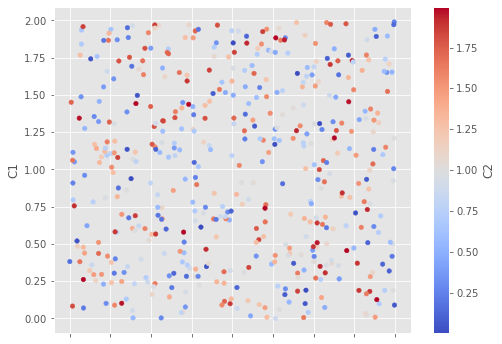

In [18]:
df.plot.scatter(x='C0', y='C1', c='C2', cmap='coolwarm', figsize=(8, 6))
plt.show()

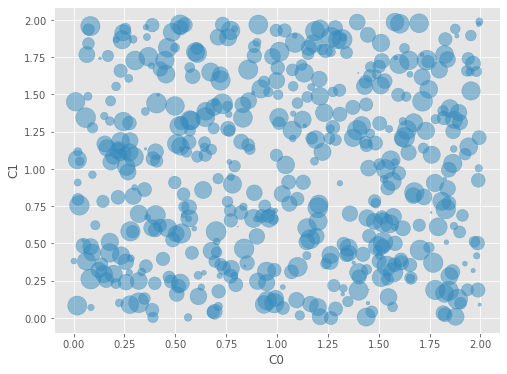

In [19]:
df.plot.scatter(x='C0', y='C1', s=df['C2']*200, alpha=0.5, figsize=(8, 6))   # s debe ser entero
plt.show()

## Seaborn: otra libreria gráfica
Seaborn es una librería de visualización construida sobre matplotlib, pero cuya intención es ser utilizada para la presentación de datos estadísticos, ya que muestra fácilmente la relación que guardan los datos para detectar tendencias y patrones.

* Manejo de los datos: Seaborn es capaz de “entender” directamente un DataFrame, representando fácilmente distribuciones de datos o agregaciones, sin desarrollar muchas líneas de código.

* Visualizaciones disponibles: Los gráficos ayudan a entender los datos y para ello, es necesario seleccionar el gráfico más adecuado. La galería de seaborn es una de las más amplias, desarrollada para representar análisis estadísticos de forma sencilla.

* Personalización: El aspecto visual de un gráfico que tan laborioso es con matplotlib, se desarrolla de forma muy sencilla con seaborn

Hay que tener en consideración que los siguientes métodos de matplotlib son reutilizados:

* plt.figure()
* plt.title()
* plt.plot()
* plt.show()

La librería seaborn es bastante amplia y esta fuera del alcance de este curso, pero se pueden establecer sus estilos como uso básico, lo que cambiará la forma como los gráficos de matplotlib se visualizarán.

In [20]:
import seaborn as sns
sns.set_theme(style="darkgrid")

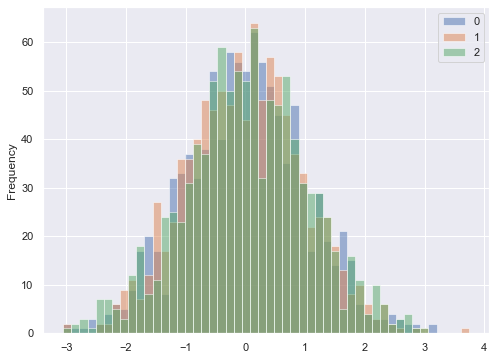

In [21]:
df = pd.DataFrame(data=np.random.randn(1000, 3))
df.plot.hist(alpha=0.5, bins=50, figsize=(8, 6))
plt.show()

# Análisis Graficos de los datos de La Liga

## Gráfico de barras de los campeones de La Liga en el tiempo

[]

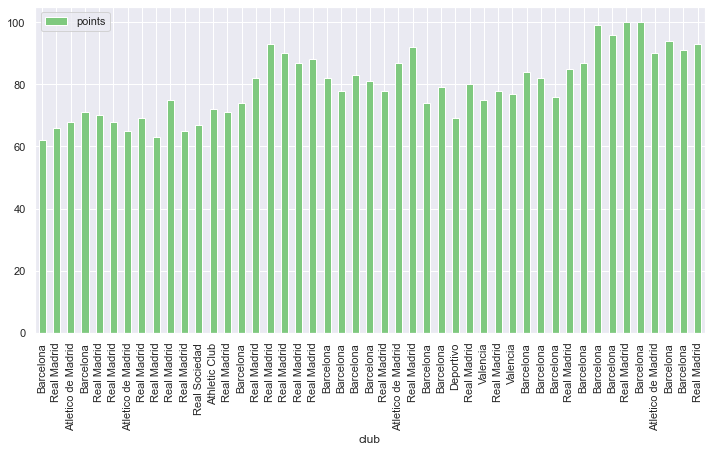

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
df_campeones_por_temporada = df.sort_values('points', ascending=False).drop_duplicates(['season']).sort_values('season')[['season', 'club', 'points']]
df_campeones_por_temporada.plot(kind='bar', x='club', y='points', ax=ax, colormap='Accent')
plt.plot()

### Gráfico de dispersión de los campeones de La Liga

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("dataset_la_liga.csv")

In [24]:
df[df['club'] == 'Villarreal'].describe()

,home_win,away_win,home_loss,away_loss,matches_won,matches_lost,matches_drawn,total_matches,points,home_goals,away_goals,goals_scored,goals_conceded,goal_difference
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,10.294118,5.352941,3.941176,8.294118,15.647059,12.235294,10.117647,38.0,57.058824,30.705882,21.764706,52.470588,46.411765,6.058824
std,2.365500,2.644361,1.477777,2.640187,4.030217,2.969205,2.471901,0.0,10.568057,4.753482,4.548755,8.147988,8.818013,13.362590
min,6.000000,2.000000,1.000000,4.000000,8.000000,9.000000,5.000000,38.0,36.000000,23.000000,13.000000,39.000000,33.000000,-16.000000
25%,9.000000,3.000000,3.000000,7.000000,14.000000,9.000000,8.000000,38.0,54.000000,28.000000,19.000000,47.000000,39.000000,-2.000000
50%,10.000000,5.000000,4.000000,9.000000,16.000000,12.000000,10.000000,38.0,59.000000,30.000000,21.000000,50.000000,44.000000,7.000000
75%,12.000000,7.000000,4.000000,10.000000,18.000000,14.000000,12.000000,38.0,64.000000,33.000000,25.000000,58.000000,53.000000,11.000000
max,14.000000,12.000000,7.000000,13.000000,24.000000,18.000000,15.000000,38.0,77.000000,41.000000,30.000000,69.000000,63.000000,32.000000


In [25]:
df1 = df.sort_values('points', ascending=False).drop_duplicates(['season']).sort_values('season')[['season', 'club', 'points']]
df2 = df1[['club', 'season']].groupby('club').count().sort_values('season', ascending=False)
df3 = df1[['club', 'points']].groupby(by='club').mean()

df2.reset_index(inplace=True)
df3.reset_index(inplace=True)

#print(df2)
#print(df3)
df_result = df2.merge(df3).drop_duplicates('club').sort_values('season')
df_result

,club,season,points
4,Athletic Club,1,72.000000
5,Deportivo,1,69.000000
6,Real Sociedad,1,67.000000
3,Valencia,2,76.000000
2,Atletico de Madrid,4,77.500000
1,Barcelona,18,82.944444
0,Real Madrid,20,79.650000


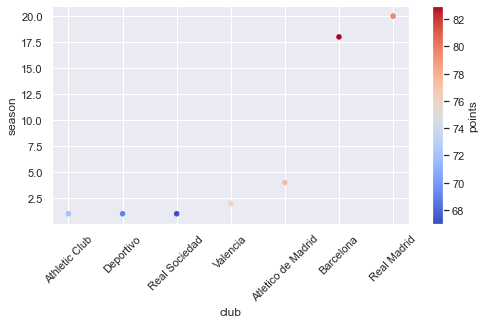

In [26]:
df_result.plot(kind='scatter', figsize=(8, 4), x='club', y='season', c='points', colormap='coolwarm', sharex=False)
plt.xticks(rotation=45)
plt.show()

## Pandas y ipywidgets

In [13]:
from ipywidgets import Select, interactive, interact
from IPython.display import display

df = pd.read_csv("dataset_la_liga.csv")
df.columns

Index(['season', 'club', 'home_win', 'away_win', 'home_loss', 'away_loss',
       'matches_won', 'matches_lost', 'matches_drawn', 'total_matches',
       'points', 'home_goals', 'away_goals', 'goals_scored', 'goals_conceded',
       'goal_difference'],
      dtype='object')

In [5]:
items = ['Todos'] + sorted(df['club'].unique().tolist())

In [15]:
@interact(x=Select(description="Clubs", options=items))
def filter_data(x=''):
    if x=='Todos': return df
    return df[df['club'] == x]


interactive(children=(Select(description='Clubs', options=('Todos', 'AD Almeria', 'Alaves', 'Albacete', 'Almer…